In [8]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib
import numpy as np

%matplotlib inline

In [9]:
Location = 'redfin.csv'
df = pd.read_csv(Location)

### Select needed columns from dataset

In [10]:
#list(df.columns.values)
df = df[['CITY', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET']]
df = df.loc[df['CITY'] == 'Bothell']

### Drop NA values

In [11]:
df = df.dropna(how='all')
df = df.fillna(df.mean())

### BEDS -> PRICE scatter-plot

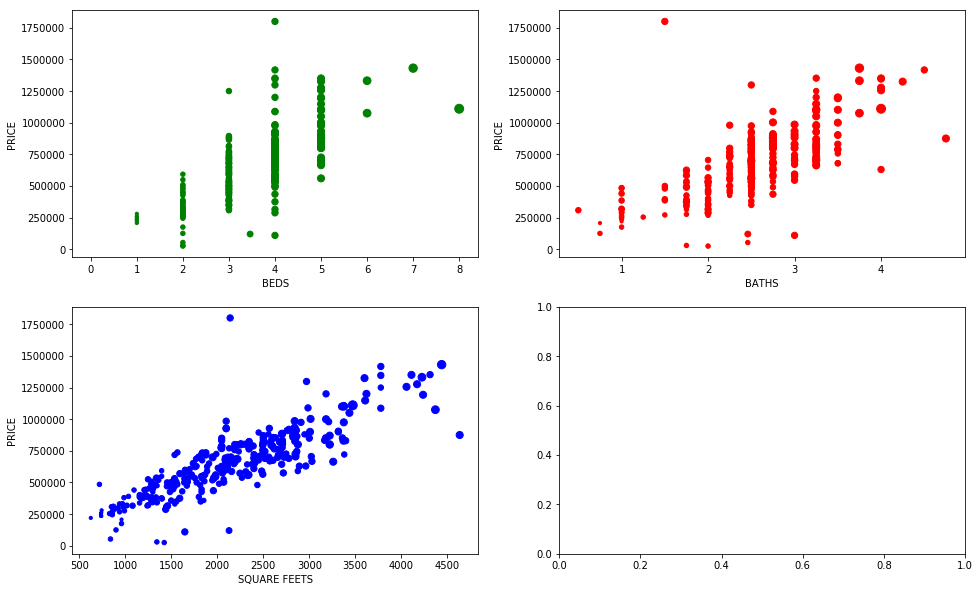

In [12]:
fig, ax_arr = plt.subplots(nrows=2, ncols=2, # let their scales be different
                       sharex=False, sharey=False)

fig.set_figwidth(16)
fig.set_figheight(10)

ax_arr[0][0].set_xlabel('BEDS')
ax_arr[0][0].set_ylabel('PRICE')
ax_arr[0][0].scatter(df['BEDS'], df['PRICE'], marker='o', c='g', s=df['BEDS']*10)

ax_arr[0][1].set_xlabel('BATHS')
ax_arr[0][1].set_ylabel('PRICE')
ax_arr[0][1].scatter(df['BATHS'], df['PRICE'], marker='o', c='r', s=df['BEDS']*10)

ax_arr[1][0].set_xlabel('SQUARE FEETS')
ax_arr[1][0].set_ylabel('PRICE')
ax_arr[1][0].scatter(df['SQUARE FEET'], df['PRICE'], marker='o', c='b', s=df['BEDS']*10)

In [13]:
df.describe()

,PRICE,BEDS,BATHS,SQUARE FEET
count,3.380000e+02,338.000000,338.000000,338.000000
mean,6.483893e+05,3.459941,2.459337,2128.396396
std,2.674678e+05,1.078120,0.683259,802.522758
min,2.500000e+04,0.000000,0.500000,626.000000
25%,4.575000e+05,3.000000,2.000000,1506.750000
50%,6.500000e+05,4.000000,2.500000,2097.000000
75%,8.058362e+05,4.000000,2.750000,2663.750000
max,1.800000e+06,8.000000,4.750000,4634.000000


### PRICE histogram

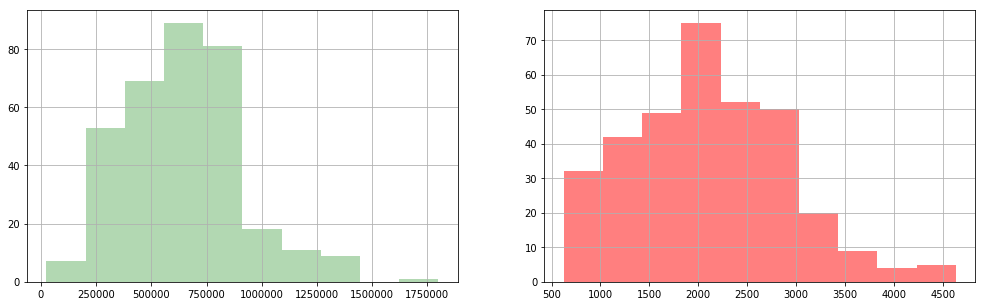

In [14]:
fig, ax_arr = plt.subplots(nrows=1, ncols=2, # let their scales be different
                       sharex=False, sharey=False)

fig.set_figwidth(17)
fig.set_figheight(5)

freq_arr, bin_arr, _ = ax_arr[0].hist(df['PRICE'], facecolor='g', alpha=0.3)
ax_arr[0].grid()

freq_arr, bin_arr, _ = ax_arr[1].hist(df['SQUARE FEET'], facecolor='r', alpha=0.5)
ax_arr[1].grid()

### Add column consisting of 1s

In [15]:
df['Ones'] = 1
df['PRICE'] = df['PRICE']/10000

### 60% training, 20% validation, 20% testing data

In [16]:
train, validate, test = df[:int(len(df)*0.6)], df[int(len(df)*0.6) : int(len(df)*0.8)], df[int(len(df)*0.8) : int(len(df))]

In [17]:
train_Y = train['PRICE'].values
train_X = train[['Ones', 'BEDS', 'BATHS', 'SQUARE FEET']].values

In [18]:
validate_Y = validate['PRICE'].values
validate_X = validate[['Ones', 'BEDS', 'BATHS', 'SQUARE FEET']].values

In [19]:
test_Y = test['PRICE'].values
test_X = test[['Ones', 'BEDS', 'BATHS', 'SQUARE FEET']].values

# Y = X THETA
THETA = (Xt X)-1 XtY

In [20]:
XtX_inv = np.linalg.inv( np.dot(np.transpose(train_X), train_X) )

In [21]:
XtY = np.dot(np.transpose(train_X), train_Y)

In [22]:
theta = np.dot(XtX_inv, XtY)

In [23]:
theta

array([-3.03937894,  1.83838807,  4.58090135,  0.02314388])

In [24]:
err = (np.dot(validate_X, theta) - validate_Y) ** 2

In [25]:
err

array([5.06088450e-02, 3.80307525e-01, 1.83552509e+01, 7.94673362e+02,
       4.00672337e+00, 3.39689864e+01, 1.42292861e+04, 1.42534033e+01,
       1.36324486e+02, 1.09636086e+02, 3.38547156e+01, 1.54432278e+01,
       5.22698237e+01, 3.00799848e+00, 5.43799517e+00, 6.78302345e+02,
       5.58124453e+00, 8.09422813e+00, 2.96440972e+01, 4.77248873e+01,
       5.16177891e+01, 1.44878071e+02, 1.13694335e+02, 8.87386964e+01,
       1.49757158e+02, 7.49675617e+01, 4.71426716e+01, 1.49266226e+01,
       5.21710895e+01, 7.42194708e+01, 4.35261392e+01, 7.37647727e+02,
       1.73094071e+01, 8.60092617e+02, 6.07633674e+02, 7.90619237e+01,
       5.11885747e+01, 1.50292225e+00, 8.25725455e+01, 5.47754340e+01,
       1.58287898e+00, 8.03393486e+01, 5.76446047e-01, 2.37205778e+02,
       5.23995566e+00, 3.51968208e+01, 5.63879501e+01, 1.47049266e+02,
       6.87451505e-01, 6.60714004e+01, 2.31654496e+01, 1.89878646e+00,
       9.68158492e-01, 7.89740618e+01, 1.27383142e+02, 2.09856893e+01,
      

### sqrt(sum of errors) / sizeof(errors)

In [26]:
np.sqrt( np.sum(err) ) / np.size(err)

2.167332779652944

In [27]:
predicted_Y = np.dot(test_X, theta)
predicted_Y

array([ 25.12203539,  25.12203539,  31.18414507,  41.40061772,
        33.35966979,  31.61270357,  41.36629862,  47.55609636,
        56.28133913,  41.59773742,  40.89145235,  31.53130327,
        71.28859494,  32.54963399,  81.14709439,  25.37661807,
        25.37661807,  20.48323784,  73.64927071,  74.63248889,
        79.83906845,  79.58527921, 135.16058294,  75.15362291,
        73.64927071,  97.09243429,  57.66997193,  32.54963399,
        66.60076907,  52.84566312,  43.49668925,  27.4364234 ,
        56.04990033,  67.73481919,  67.73481919,  66.60076907,
        67.74599441,  65.79311361,  70.12945383,  57.48595372,
       121.00929047, 118.99851347,  63.67541208,  88.50569458,
       122.92907885,  64.49546943,  75.05910028,  54.89270633,
        77.55979299,  71.26545106,  41.0314693 ,  74.63248889,
        73.64927071,  75.01475963,  96.48953974,  61.39693007,
        71.08030002,  62.99191068,  32.05207707,  56.63967255,
        49.50018228,  67.73755975,  41.8758242 ,  38.43

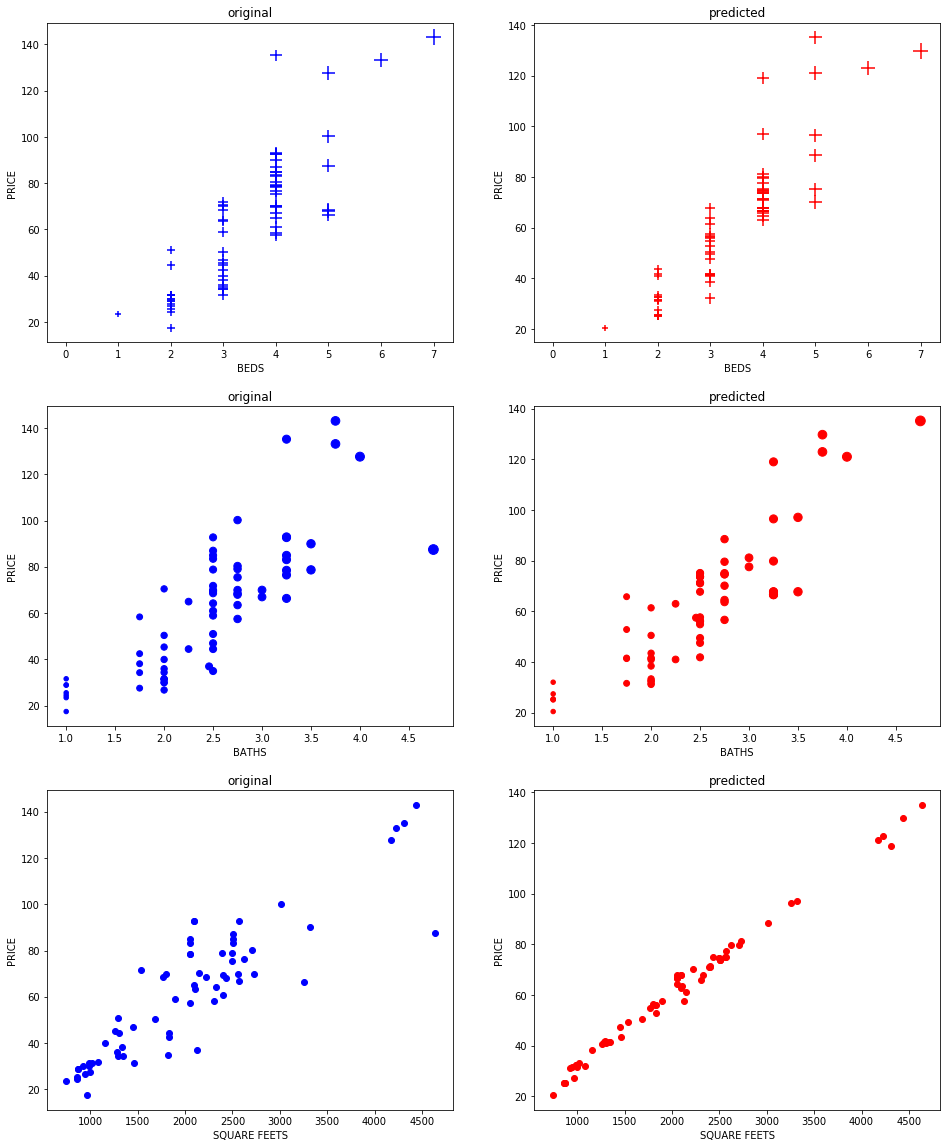

In [28]:
fig, ax_arr = plt.subplots(nrows=3, ncols=2, # let their scales be different
                       sharex=False, sharey=False)

fig.set_figwidth(16)
fig.set_figheight(20)
ax_arr[0][0].set_title('original')
ax_arr[0][0].set_xlabel('BEDS')
ax_arr[0][0].set_ylabel('PRICE')
ax_arr[0][0].scatter(test_X[:,1], test_Y, marker='+', c='b', s=test_X[:,1]*35)

ax_arr[0][1].set_title('predicted')
ax_arr[0][1].set_xlabel('BEDS')
ax_arr[0][1].set_ylabel('PRICE')
ax_arr[0][1].scatter(test_X[:,1], predicted_Y, marker='+', c='r', s=test_X[:,1]*35)

ax_arr[1][0].set_title('original')
ax_arr[1][0].set_xlabel('BATHS')
ax_arr[1][0].set_ylabel('PRICE')
ax_arr[1][0].scatter(test_X[:,2], test_Y, marker='o', c='b', s=test_X[:,2]*20)

ax_arr[1][1].set_title('predicted')
ax_arr[1][1].set_xlabel('BATHS')
ax_arr[1][1].set_ylabel('PRICE')
ax_arr[1][1].scatter(test_X[:,2], predicted_Y, marker='o', c='r', s=test_X[:,2]*20)

ax_arr[2][0].set_title('original')
ax_arr[2][0].set_xlabel('SQUARE FEETS')
ax_arr[2][0].set_ylabel('PRICE')
ax_arr[2][0].scatter(test_X[:,3], test_Y, marker='o', c='b')

ax_arr[2][1].set_title('predicted')
ax_arr[2][1].set_xlabel('SQUARE FEETS')
ax_arr[2][1].set_ylabel('PRICE')
ax_arr[2][1].scatter(test_X[:,3], predicted_Y, marker='o', c='r')